# CC DD near time point overlap DE
至少在连续两个时间点与对照相比有差异表达的基因

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# CC

In [19]:
df = pd.read_table("overlap_genes.txt")
df.head(2)

,C12_up,C12_down,C24_up,C24_down,C36_up,C36_down,C48_up,C48_down,C60_up,C60_down,...,C84_up,C84_down,C96_up,C96_down,C120_up,C120_down,C168_up,C168_down,C216_up,C216_down
Solyc02g078860.3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Solyc03g025380.3,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0


In [20]:
df_Time = pd.DataFrame(np.zeros((11,2)))
df_Time.columns = ["Up", "Down"]
#df_Time.index = list(reversed(["C12", "C24", "C36", "C48", "C60", "C72", "C84", "C96", "C120"]))
df_Time.index = ["C12", "C24", "C36", "C48", "C60", "C72", "C84", "C96", "C120", "C168", "C216"]
for i in df_Time.index:
    df_s = df[["{0}_up".format(i), "{0}_down".format(i)]]
    df_Time.loc[i, "Up"] = df.sum()["{0}_up".format(i)]
    df_Time.loc[i, "Down"] = df.sum()["{0}_down".format(i)]

df_Time

,Up,Down
C12,932.0,820.0
C24,724.0,400.0
C36,1549.0,330.0
C48,2068.0,493.0
C60,1631.0,218.0
C72,1206.0,124.0
C84,1036.0,111.0
C96,1138.0,181.0
C120,1182.0,96.0
C168,902.0,209.0


In [21]:
df_plot = pd.DataFrame(np.zeros((22, 22)))
df_plot.columns = df.columns
df_plot.index = df.columns
df_plot_cp = df_plot.copy()

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
for i in df_plot.columns:
    for j in df_plot.columns:
        if i==j:
            df_plot.loc[i,j] = 0 
            #df_plot.loc[i,j] = df[i].sum()
        else:
            df_s = df[[i,j]]
            df_s["sum"] = df_s[i] + df_s[j]
            df_s = df_s[df_s["sum"]==2]
            df_plot.loc[i,j] = df_s.shape[0]


In [24]:
import seaborn as sns

In [25]:
order =  ["C12_up", "C24_up", "C36_up", "C48_up", "C60_up", "C72_up", "C84_up", "C96_up", "C120_up","C168_up","C216_up",
               "C12_down", "C24_down", "C36_down", "C48_down", "C60_down", "C72_down", "C84_down", "C96_down", "C120_down", "C168_down", "C216_down"
         ]
df_plot2 = df_plot.loc[order, order]


In [26]:
df3 = pd.DataFrame(np.zeros((10,2)))
df3.columns = ["Up", "Down"]
df3.index = ["C12_C24", "C24_C36", "C36_C48", "C48_C60", "C60_C72", "C72_C84", "C84_C96", "C96_C120", "C120_C168", "C168_C216"]
df3_cp = df3.copy()

for i in df3.index:
    tmp = i.split("_")
    df3.loc[i, "Up"] = df_plot.loc[tmp[0]+"_up",tmp[1]+"_up"]
    df3.loc[i, "Down"] = df_plot.loc[tmp[0]+"_down",tmp[1]+"_down"]
    
df3

,Up,Down
C12_C24,404.0,210.0
C24_C36,510.0,96.0
C36_C48,1290.0,197.0
C48_C60,1320.0,137.0
C60_C72,1045.0,51.0
C72_C84,723.0,15.0
C84_C96,777.0,35.0
C96_C120,813.0,46.0
C120_C168,499.0,23.0
C168_C216,312.0,27.0


<AxesSubplot:>

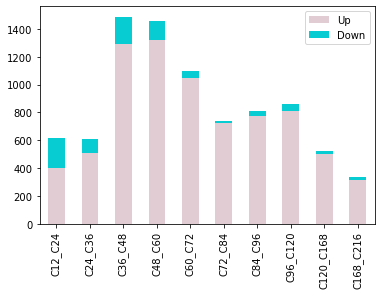

In [160]:
df3.plot.bar(color=["#E0CCD2","#07CCD2"], stacked=True)

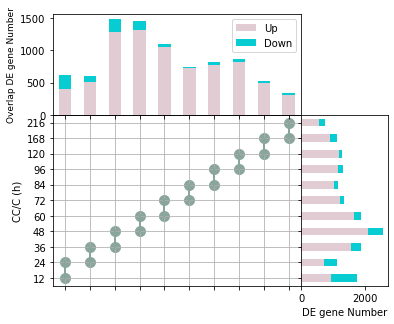

In [29]:
fig, ax = plt.subplots(figsize=(6, 5))

# the scatter plot:
aaa = [0,1,2,3,4,5,6,7,8,9,11]

for i in aaa:
    ax.scatter(i, i, color="#8AA69C", s=100)
    ax.scatter(i, i+1, color="#8AA69C", s=100)
    ax.plot([i,i],[i,i+1], color="#8AA69C", linewidth=2)

# Set aspect of the main axes.
#ax.set_aspect(1.)
#ax.set_ylim(9,1)

ax.set_yticklabels(["12","24", "36", "48", "60", "72", "84", "96", "120", "168", "216"])



# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.4, pad=0, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0, sharey=ax)

ax_histx.set_ylabel("Overlap DE gene Number", fontsize=9)
ax_histy.set_xlabel("DE gene Number")
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax.xaxis.set_tick_params(labelbottom=False)
#ax.set_xticks([])
ax.set_ylabel("CC/C (h)")


#ax_histx.xaxis.set_ticklabels([])

#ax_histx.set_xticklabels([])

df3.plot.bar(ax=ax_histx, color=["#E0CCD2","#07CCD2"], stacked=True)

df_Time.plot.barh(ax=ax_histy, stacked=True, color=["#E0CCD2","#07CCD2"])
ax_histy.get_legend().remove()
#ax_histy.set_xlim(right=0)

ax_histy.set_yticklabels(["12","24", "36", "48", "60", "72", "84", "96", "120", "168", "216"])
#ax_histx.set_xticks([])

ax.grid(b=None, which='major', axis='both', )


#plt.savefig("CC_DEoverlap.pdf")



In [28]:
df_Time

,Up,Down
C12,932.0,820.0
C24,724.0,400.0
C36,1549.0,330.0
C48,2068.0,493.0
C60,1631.0,218.0
C72,1206.0,124.0
C84,1036.0,111.0
C96,1138.0,181.0
C120,1182.0,96.0
C168,902.0,209.0


<AxesSubplot:>

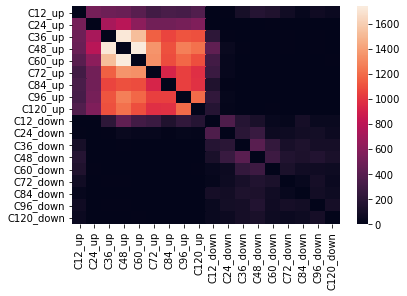

In [35]:
sns.heatmap(df_plot2)

# DD

In [2]:
df_DD = pd.read_table("~/Documents/phd/tomato_metabolic/upsetR/DD:D/DD_overlap_genes.txt")
df_DD.head(2)

,D12_up,D12_down,D24_up,D24_down,D36_up,D36_down,D48_up,D48_down,D60_up,D60_down,...,D84_up,D84_down,D96_up,D96_down,D120_up,D120_down,D168_up,D168_down,D216_up,D216_down
Solyc05g007830.3,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,0
Solyc03g025380.3,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0


In [4]:
df_DD_Time = pd.DataFrame(np.zeros((11,2)))
df_DD_Time.columns = ["Up", "Down"]
#df_Time.index = list(reversed(["C12", "C24", "C36", "C48", "C60", "C72", "C84", "C96", "C120"]))
df_DD_Time.index = ["D12", "D24", "D36", "D48", "D60", "D72", "D84", "D96", "D120", "D168", "D216"]
for i in df_DD_Time.index:
    #df_s = df[["{0}_up".format(i), "{0}_down".format(i)]]
    df_DD_Time.loc[i, "Up"] = df_DD.sum()["{0}_up".format(i)]
    df_DD_Time.loc[i, "Down"] = df_DD.sum()["{0}_down".format(i)]

df_DD_Time

,Up,Down
D12,1225.0,285.0
D24,1724.0,366.0
D36,1639.0,260.0
D48,1941.0,248.0
D60,2461.0,300.0
D72,2197.0,245.0
D84,1296.0,223.0
D96,1131.0,127.0
D120,882.0,127.0
D168,406.0,53.0


In [5]:
DD_df_plot = pd.DataFrame(np.zeros((22, 22)))
DD_df_plot.columns = df_DD.columns
DD_df_plot.index = df_DD.columns
DD_df_plot_cp = DD_df_plot.copy()

In [7]:
for i in DD_df_plot.columns:
    for j in DD_df_plot.columns:
        if i==j:
            DD_df_plot.loc[i,j] = 0 
            #df_plot.loc[i,j] = df[i].sum()
        else:
            df_s = df_DD[[i,j]]
            df_s["sum"] = df_s[i] + df_s[j]
            df_s = df_s[df_s["sum"]==2]
            DD_df_plot.loc[i,j] = df_s.shape[0]


In [8]:
DD_order =  ["D12_up", "D24_up", "D36_up", "D48_up", "D60_up", "D72_up", "D84_up", "D96_up", "D120_up","D168_up","D216_up",
               "D12_down", "D24_down", "D36_down", "D48_down", "D60_down", "D72_down", "D84_down", "D96_down", "D120_down", "D168_down", "D216_down"
         ]
DD_df_plot2 = DD_df_plot.loc[DD_order, DD_order]



In [11]:
DD_df3 = pd.DataFrame(np.zeros((10,2)))
DD_df3.columns = ["Up", "Down"]
DD_df3.index = ["D12_D24", "D24_D36", "D36_D48", "D48_D60", "D60_D72", "D72_D84", "D84_D96", "D96_D120", "D120_D168", "D168_D216"]
DD_df3_cp = DD_df3.copy()

for i in DD_df3.index:
    tmp = i.split("_")
    DD_df3.loc[i, "Up"] = DD_df_plot.loc[tmp[0]+"_up",tmp[1]+"_up"]
    DD_df3.loc[i, "Down"] = DD_df_plot.loc[tmp[0]+"_down",tmp[1]+"_down"]
    
DD_df3

,Up,Down
D12_D24,855.0,115.0
D24_D36,1264.0,136.0
D36_D48,1375.0,128.0
D48_D60,1643.0,119.0
D60_D72,1858.0,145.0
D72_D84,1014.0,37.0
D84_D96,871.0,37.0
D96_D120,720.0,47.0
D120_D168,322.0,18.0
D168_D216,232.0,9.0


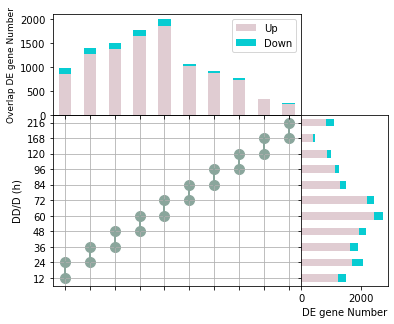

In [31]:
fig, ax = plt.subplots(figsize=(6, 5))

# the scatter plot:
aaa = [0,1,2,3,4,5,6,7,8,9,11]

for i in aaa:
    ax.scatter(i, i, color="#8AA69C", s=100)
    ax.scatter(i, i+1, color="#8AA69C", s=100)
    ax.plot([i,i],[i,i+1], color="#8AA69C", linewidth=2)

# Set aspect of the main axes.
#ax.set_aspect(1.)
#ax.set_ylim(9,1)

ax.set_yticklabels(["12","24", "36", "48", "60", "72", "84", "96", "120", "168", "216"])



# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.4, pad=0, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0, sharey=ax)

ax_histx.set_ylabel("Overlap DE gene Number", fontsize=9)
ax_histy.set_xlabel("DE gene Number")
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax.xaxis.set_tick_params(labelbottom=False)
#ax.set_xticks([])
ax.set_ylabel("DD/D (h)")


#ax_histx.xaxis.set_ticklabels([])

#ax_histx.set_xticklabels([])

DD_df3.plot.bar(ax=ax_histx, color=["#E0CCD2","#07CCD2"], stacked=True)

df_DD_Time.plot.barh(ax=ax_histy, stacked=True, color=["#E0CCD2","#07CCD2"])
ax_histy.get_legend().remove()
#ax_histy.set_xlim(right=0)

ax_histy.set_yticklabels(["12","24", "36", "48", "60", "72", "84", "96", "120", "168", "216"])
#ax_histx.set_xticks([])


ax.grid(b=None, which='major', axis='both', )


plt.savefig("/Users/yuanzan/Documents/phd/tomato_metabolic/upsetR/DD:D/DD_DEoverlap.pdf")

